# Gradient descent 

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. But if we instead take steps proportional to the positive of the gradient, we approach a local maximum of that function; the procedure is then known as gradient ascent. Gradient descent is generally attributed to Cauchy, who first suggested it in 1847,[1] but its convergence properties for non-linear optimization problems were first studied by Haskell Curry in 1944.

**Repeat Until convergence: {**

$$ \theta_1  =\theta_1 - \alpha \frac{\partial}{\partial \theta_1} l(\hat{y},y)$$

$$ \theta_2  =\theta_2 - \alpha \frac{\partial}{\partial \theta_2} l(\hat{y},y)$$  
$$ . $$
$$ . $$
$$ . $$
$$ \theta_n  =\theta_n - \alpha \frac{\partial}{\partial \theta_n} l(\hat{y},y)$$  
    
    
**$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $ }**

### Example gradient Descent with  Mean Squared Error  (L2 Euclidian Norm)  Loss Function 


<font color=#000066> 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
W_1 \;\;\;\;\;\; b_1 
$
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\downarrow \;\;\;\;\;\;\; \downarrow $
\begin{equation}
X \to \boxed{\bar{y}= W_1X +b_1} \to  \boxed{ L(y,\bar{y})} \leftarrow y
\end{equation}
</font>

we can also exapnd the dimensions of X adding ones and include the bais term in the Weights:

<font color=#000066> 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
W_1$
<br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;
\downarrow$
\begin{equation}
X \to \boxed{\bar{y}= W_1X} \to  \boxed{ L(y,\bar{y})} \leftarrow y
\end{equation}
</font>

The basic preocedure to solve this optimzation problem is to use gradient descent to guide the algorithm to teh best paramter:

$$W^* = argmin_w L(w) $$

From our Calculus lectures we know that we can find the minimum or maximum point of a function with it's derivative. We also know that the a point is a maximum or a minimum if and only if:

$$\frac{\partial L}{\partial W} = 0 $$

`Ideally` since we defined our loss function $L$ as a strictlly  monotonically decreasing function  we know that $ \frac{\partial L}{\partial W} = 0 $. In practice we will find a either a local or global mimimum.


#### Losss functions:

##### L2 Norm:
$$ L_{L2}(y,\bar{y}) = \frac{1}{N} \sum_{i=1}^{N}(\bar{y_i}-y_i)^2  = \frac{1}{N} \sum_{i=1}^{N}(X_i^{T}W-y_i)^2$$

Therefore we define the derivative of the $L2$ Norm as with respect to $W$ as:

$$ \frac{\partial }{\partial W}L_{L2}(y,\bar{y}) = \frac{\partial }{\partial W} \frac{1}{N} \sum_{i=1}^{N}(X_i^{T}W-y_i)^2 = \frac{1}{N} \sum_{i=1}^{N}\frac{\partial }{\partial W}(X_i^{T}W-y_i)^2  = \frac{1}{N} \sum_{i=1}^{N}2X_i(X_i^TW-y_i) $$



#### Gradient Descent 
**Repeat Until Convergence: {**

$$ W  =W- \alpha \frac{\partial}{\partial W} l(\hat{y},y) = W- \alpha \frac{2}{N} \sum_{i=1}^{N}X_i(X_i^TW-y_i)$$


    
**$ \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; $ }**

You may have notice that we are using a vecotrizd implementation, at the end of the day there is no differnece (besides speed), the reader may use the implementation fits best for his needs, since applying a vectorized implementation in lower level langauges may be more difficult.

#### Un vectoried Implemantation

In [2]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [58]:
def gradient_descent_linear_regression(x,y,a,epochs):
    loss_vector = []
    m=len(y)
    ### Random initalization ###
    theta_0= np.random.random(1)
    theta_1= np.random.random(1)
    
    ### make subplots ###
    figure, axis = plt.subplots(ncols=2,nrows=1,figsize=(18,7))
    ax=axis.flatten() # flatten axis
    
    for i in range(0,epochs): 
        h=theta_1*x + theta_0       # make prediction
        ### Print prediction line only on specefied epochs ###
        if i == 1 or i == 2 or i == (epochs-1):
            ax[0].plot(x,h,linestyle='dashed', label=f"Epoch: {i+1}")
            
        ###  loss Unvectorized implementation  ###
        loss=0                             # intialize loss constant as 0
        for  i in range(0,m):              # Iterate over lenght of data vector
            loss = loss  + (h[i]-y[i])**2  # Calculate loss with L2 Norm
        loss = loss/m                      # Devide by number of data (mean squared loss)       
        loss_vector.append(loss)           # Append loss to vector     
            
        ### Gradient Descent  Unvecorized implementation ###
        e0=0                   # init erro 0
        e1=0                   # init erro 1
        for i in range(0,m):   # iterate over data vector
            e0= e0 + h[i]-y[i]        # calculate the derivative of loss with respect to theta 0 
            e1= e1 + (h[i]-y[i])*x[i]  # calculate the derivative of loss with respect to theta 1
        
        theta_0= theta_0 - ((a/m)*e0)
        theta_1= theta_1 - ((a/m)*e1)
    
    ### Plot regression ###
    ax[0].plot(x,y,color="tab:red", label="Real Data" ) 
    ax[0].legend(loc="upper right")
    ax[0].set_title(f"$w_1$ ={theta_1}, $w_0$ ={theta_0}")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    
    ### Plot Loss Function ###
    ax[1].plot(loss_vector,color="tab:red", label="Loss" ) 
    ax[1].legend(loc="upper right")
    ax[1].set_title(" Epochs vs Loss Function ")
    ax[1].set_xlabel("epoch")
    ax[1].set_ylabel("Loss")
    plt.show()

    return (theta_0,theta_1)


    

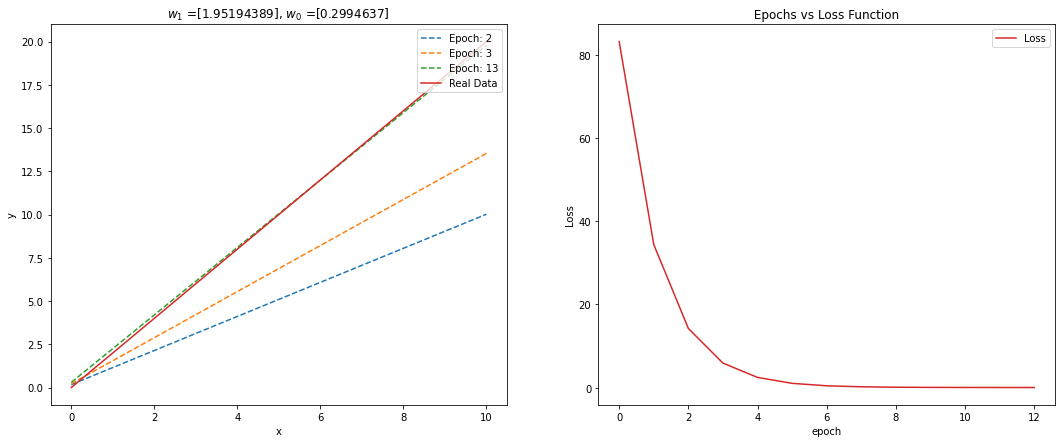

In [66]:
# Dummy data
x=np.linspace(0,10,11)
y=2*x

w0,w1 = gradient_descent_linear_regression(x,y,a=0.01,epochs=13)